# <center>Opinion Mining and Sentiment Analysis on Consumer Product Reviews: A Natural Language Processing Approach</center>

## <center> Introduction </center>

In the contemporary e-commerce era, consumer decision-making is profoundly influenced by online product reviews. The imperative to comprehend these reviews is of prime importance for both consumers and businesses. In this context, this research utilizes Natural Language Processing (NLP) to facilitate opinion mining and sentiment analysis on consumer product reviews. The primary objective is to systematically extract relevant product features and associated sentiments to encapsulate aggregate consumer perspectives. This report delineates the methodological approach, its implementation, and the resultant findings, underscoring the efficacy of NLP techniques in extracting meaningful insights from textual data.

The surge in online shopping and product reviews (Rose et al., 2011) renders manual data extraction and interpretation impractical. Automation emerges as a compelling solution, particularly for processing large datasets to discern patterns reflective of consumer predilections (Hu & Liu, 2004). Predicated on the foundational contributions of Hu and Liu (2004), this research endeavors to construct an Opinion Mining solution adept at pinpointing pivotal product attributes and associated sentiments. Methodologically, this involves leveraging techniques including Parts of Speech (PoS) tagging, chunking, Latent Semantic Analysis (LSA) and Pointwise Mutual Information (PMI) to prune and retain only the most relevant product features and the Naïve Bayes algorithm as a baseline for sentiment analysis.

The present study integrates advanced NLP methodologies to elucidate complexities in sentiment analysis. To achieve a more rigorous analytical depth, a comparative study has been formulated. This juxtaposes the predictive capabilities of a baseline Naïve Bayes model with TextBlob, a lexicon-driven sentiment analysis tool (Loria et al., 2018).

This report offers a detailed overview of the dataset, methodology, preliminary results, comparative analysis, and synthesis of findings for future research.

## <center> Methodology </center>

The design of an Opinion Mining system is a multi-step, methodical approach that requires a thorough understanding of data it is intentioned to be be used and applicable techniques for feature extraction, sentiment analysis and summarisation. It relies on rigorous evaluation across its stages, particularly on benchmark datasets, to ensure optimal performance.

Overall, this experiment comprises three subsystems - Feature Extraction, Sentiment Analysis, and Summarization:

1. **Feature Extraction**: Feature extraction involves identifying keyphrases describing product features employing techniques including Parts of Speech (PoS) tagging, chunking, Latent Semantic Analysis (LSA) and Pointwise Mutual Information (PMI).

2. **Sentiment Analysis**: Sentiment Analysis detects polarity in sentences discussing product features. This subsystem is target of a comparative experiment, using a baseline Naïve Bayes model and a pre-trained TextBlob model.

3. **Summarisation**: Summarization combines features and sentiments, resulting in a final output format as following:

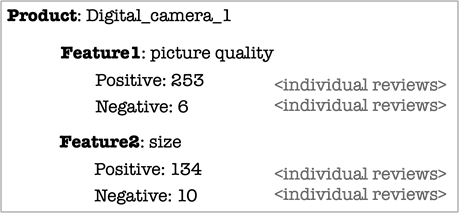

### <center> Task and Data Analyses </center>

Data for this project is derived from previous research associated with several papers (Hu & Liu, KDD-2004; Ding, Liu & Yu, WSDM-2008; Liu et al., IJCAI-2015), and encompasses:

- Annotated Customer Review Datasets (5 products) linked to Hu and Liu (KDD-2004).
- Additional Customer Review Datasets (9 products) including some used in Ding, Liu, and Yu (WSDM-2008).
- More Customer Review Datasets (3 products) utilized in Liu et al. (IJCAI-2015).

The essential data analysis phase includes:
- Understanding Data Structure and Format, foundational for model development (Kelleher et al., 2015).
- Checking Data Balance to mitigate biases in the model (He & Ma, 2013).
- Identifying Common Features to inform feature extraction (Guyon & Elisseeff, 2003).
- Assessing Data Quality for the model's reliability (Pipino et al., 2002).
- Evaluating Sentiment Annotations to align the model with human-annotated sentiments (Pang & Lee, 2008).

The data analysis phase sets the foundation for the Opinion Mining system. It follows best practices in Data Science and Machine Learning (ML) by thoroughly examining data's structure, balance, features, quality, and annotations to ensure a well-informed model development. 

In subsequent stages, this process is demonstrated.

In [1]:
import os
import re
import string

import pandas as pd

# Change original pandas configuration faciliate visualisation.
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)


def load_data(folder_paths):
    all_reviews = []
    for folder in folder_paths:
        files = os.listdir(folder)
        reviews = []
        for file in files:
            if file.endswith(".txt") and file != "Readme.txt":
                try:
                    with open(os.path.join(folder, file), encoding='utf-8') as f:
                        content = f.read()
                except UnicodeDecodeError:
                    with open(os.path.join(folder, file), encoding='ISO-8859-1') as f:
                        content = f.read()

                # Handle the content differently based on the directory
                if 'Customer_review_data' in folder:
                    content = content.split("*****")[-1]  # Skip header for Customer_review_data

                reviews.append((folder, file, content.strip()))

        all_reviews.extend(reviews)
                        
    return pd.DataFrame(all_reviews, columns=['folder', 'filename', 'reviews'])


folder_paths = [
    "Data/CustomerReviews-3_domains", 
    "Data/Customer_review_data", 
    "Data/Reviews-9-products"
]
df_raw_all_reviews = load_data(folder_paths)

total_files = len(df_raw_all_reviews)
print("Total of loaded files: ", total_files)
df_raw_all_reviews.head(total_files)

Total of loaded files:  17


,folder,filename,reviews
0,Data/CustomerReviews-3_domains,Computer.txt,## I purchased this monitor because of budgetary concerns .\ninexpensive[+1][a] ## This item was the most inexpensive 17 inch monitor available to me at the time I made the purchase .\nmonitor[-1]...
1,Data/CustomerReviews-3_domains,Speaker.txt,"speakers[+1] ## These speakers are incredibly amazing .\n## Before this I had the jbl on stage , which were also incredibly good .\n## But I wanted something that I can play without having to plug..."
2,Data/CustomerReviews-3_domains,Router.txt,"price[+1], item[+1], customer service[+1] ## Affordable price , reliable item and excellent customer service .\ncustomer service[+1] ## I did have problem connecting my laptop to the internet but ..."
3,Data/Customer_review_data,Nokia 6610.txt,"**\n\n[t]excellent phone , excellent service . \n##i am a business user who heavily depend on mobile service . \nphone[+3], work[+2]##there is much which has been said in other reviews about the f..."
4,Data/Customer_review_data,Canon G3.txt,**\n\n[t]excellent picture quality / color \ncanon powershot g3[+3]##i recently purchased the canon powershot g3 and am extremely satisfied with the purchase . \nuse[+2]##the camera is very easy t...
5,Data/Customer_review_data,Creative Labs Nomad Jukebox Zen Xtra 40GB.txt,"**\n\n[t] a quick update to the new zen nx ? \n##this is an edited review , now that i have had time to use the device . \naffordability[+3]##while , there are flaws with the machine , the xtra ge..."
6,Data/Customer_review_data,Apex AD2600 Progressive-scan DVD player.txt,"**\n\n[t] troubleshooting ad-2500 and ad-2600 no picture scrolling b/w . \n##repost from january 13 , 2004 with a better fit title . \n##does your apex dvd player only play dvd audio without video..."
7,Data/Customer_review_data,Nikon coolpix 4300.txt,"**\n\n[t]the best 4mp compact digital available \ncamera[+2]##this camera is perfect for an enthusiastic amateur photographer . \npicture[+3], macro[+3]##the pictures are razor-sharp , even in ma..."
8,Data/Reviews-9-products,norton.txt,"[t]\nsoftware[-3]##I have read the installation instructions for both NIS 2004 and NAV 2004 prior to installation, but still ended up with the same result...junk software.\n##Why is it that I can ..."
9,Data/Reviews-9-products,Nokia 6600.txt,[t]\nphone[+3][u]##I've had this beauty for nearly 2 months now and I truely love it.\nbattery life[-2]##The only disappointment so far has been battery life.\nbattery life[-2][u]##Mine generally ...


The extraction process follows a well-structured procedure, which consists of:

| Process Step             | Description                                                                                                                                                                                                 |
|--------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Product Identification**   | Associating extracted features with the correct product by identifying it from the filename.                                                                                                               |
| **Line Parsing**             | Dividing reviews into individual lines and parts using '##' separator to distinguish labels and sentences.                                                                                                  |
| **Label Extraction**         | Using a regular expression pattern to extract labels, sentiment strengths, and symbols according to the format in the datasets' readme.txt.                                                                |
| **DataFrame Construction**   | Organizing the extracted information into a DataFrame with the following columns:                                                                                                                          |
|                          | - **Product**: Allows analyses specific to individual products.                                                                                                                                            |
|                          | - **Review**: Core information, sentences that contain opinions (i.e., are sentiment-bearing) about the product features.                                                                                                                                                                                         |
|                          | - **Review Length**: Useful for understanding the complexity of the reviews.  For instance, longer reviews may provide a richer sentiment context, whereas shorter ones might be more direct.                                                                                                                            |
|                          | - **Feature and Sentiment Strength**: Essential for representing the attributes of the product and the associated sentiment.                                                                                |
|                          | - **Symbol Handling**: Provides nuanced understanding of sentiment.                                                                                                                                        |



This structured approach provides concise representation of annotated data, enabling further analysis and insights, as demonstrated next.

In [2]:
def extract_annotated_features(product_reviews):
    """
    This function extracts the annotated features from the product_reviews data.
    It parses the annotations and creates a DataFrame with columns for product,
    sentence, feature, sentiment_strength, and symbol.
    """
    labeled_sentences = []
    pattern = re.compile(r'(\w+)\[([+-]?\d*)](\[\w+])?')

    for index, product_review in product_reviews.iterrows():
        product = product_review["filename"].split('.txt')[0]
        lines = product_review["reviews"].split('\n')
        for line in lines:
            if line and '##' in line:
                if not line.startswith('##'):
                    parts = line.split('##')
                    labels = parts[0].strip()
                    sentence = parts[1].strip()
                    label_info = pattern.findall(labels)  # Extract labels, sentiment strengths, and symbols
                    labels = [label for label, _, _ in label_info]
                    sentiment_strengths = [strength for _, strength, _ in label_info]
                    symbols = [symbol.replace('[','').replace(']','') if symbol else 'none' for _, _, symbol in label_info]
                    labeled_sentences.extend([(product, sentence, len(sentence), label, strength, symbol) 
                                              for label, strength, symbol in zip(labels, sentiment_strengths, symbols)])

    df = pd.DataFrame(labeled_sentences, columns=['product', 'review', 'review_length', 'product_feature', 'sentiment_strength', 'symbol'])

    return df

df_all_reviews = extract_annotated_features(df_raw_all_reviews)
df_all_reviews.head(-1)

,product,review,review_length,product_feature,sentiment_strength,symbol
0,Computer,This item was the most inexpensive 17 inch monitor available to me at the time I made the purchase .,100,inexpensive,+1,a
1,Computer,My overall experience with this monitor was very poor .,55,monitor,-1,none
2,Computer,When the screen was n't contracting or glitching the overall picture quality was poor to fair .,95,screen,-1,none
3,Computer,When the screen was n't contracting or glitching the overall picture quality was poor to fair .,95,quality,-1,none
4,Computer,I 've viewed numerous different monitor models since I 'm a college student and this particular monitor had as poor of picture quality as any I 've seen .,154,monitor,-1,none
...,...,...,...,...,...,...
5776,Canon PowerShot SD500,And the video quality is amazing.,33,video,+3,none
5777,Canon PowerShot SD500,And it fits right in my pocket much easier than my old S30.,59,fits,+3,none
5778,Canon PowerShot SD500,I thought this camera was awful and I did tons of research on CNET and other sites.,83,camera,-1,none
5779,Canon PowerShot SD500,There were many times when I clicked the automatic shutter and nothing happens.,79,shutter,-3,none


##### <center> Simplification of sentiment strength </center>

This experiment simplifies sentiment strength into negative and positive binary categories, addressing subjective nature and reducing ambiguity. This method is consistent with sentiment analysis tasks, which focus on discerning text tone (Pang & Lee, 2008). The binary approach streamlines modeling and enhances robustness in inconsistent annotations. However, potential trade-offs include overlooking nuanced differences in sentiment strength, which has been considered acceptable for this experiment purpose.

##### <center> Initial Data Normalisation </center>

Preselected features should be normalised. Dataset cleaning standardizes the text by converting it to lowercase, removing punctuation, and eradicating superfluous whitespace. This standardization minimizes inconsistencies and potential errors, ensuring the data is ready for further preprocessing techniques and analysis. Such preprocessing is foundational in NLP to enable accurate algorithmic interpretations of the text (Bird et al., 2009).

The subsequent cell illustrates the initial normalization process.

In [3]:
def normalise_data(df):
    """
    This function applies basic text cleaning operations to the DataFrame.
    It normalizes the text to lower case, removes punctuation, and converts sentiment_strength to binary sentiment (0 for negative, 1 for positive).
    Neutral sentiment is treated as positive.
    """
    df_cleaned = df.copy()
    df_cleaned['product'] = df_cleaned['product'].apply(lambda x: x.lower().strip())
    df_cleaned['product_feature'] = df_cleaned['product_feature'].apply(lambda x: x.lower().strip())
    df_cleaned['review'] = df_cleaned['review'].apply(lambda x: x.lower().strip())
    df_cleaned['symbol'] = df_cleaned['symbol'].apply(lambda x: x.strip() if not 'none' else '')
    df_cleaned['review'] = df_cleaned['review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    df_cleaned['sentiment_strength'] = df_cleaned['sentiment_strength'].apply(lambda x: 0 if '-' in x else 1)
    df_cleaned = df_cleaned.rename(columns={'sentiment_strength': 'sentiment'})
    return df_cleaned

df_all_reviews_cleaned = normalise_data(df_all_reviews)
df_all_reviews_cleaned.head(-1)

,product,review,review_length,product_feature,sentiment,symbol
0,computer,this item was the most inexpensive 17 inch monitor available to me at the time i made the purchase,100,inexpensive,1,
1,computer,my overall experience with this monitor was very poor,55,monitor,0,
2,computer,when the screen was nt contracting or glitching the overall picture quality was poor to fair,95,screen,0,
3,computer,when the screen was nt contracting or glitching the overall picture quality was poor to fair,95,quality,0,
4,computer,i ve viewed numerous different monitor models since i m a college student and this particular monitor had as poor of picture quality as any i ve seen,154,monitor,0,
...,...,...,...,...,...,...
5776,canon powershot sd500,and the video quality is amazing,33,video,1,
5777,canon powershot sd500,and it fits right in my pocket much easier than my old s30,59,fits,1,
5778,canon powershot sd500,i thought this camera was awful and i did tons of research on cnet and other sites,83,camera,0,
5779,canon powershot sd500,there were many times when i clicked the automatic shutter and nothing happens,79,shutter,0,


##### <center> Data Imbalance Examination </center> 

Following data normalization, it's essential to analyze the dataset's features for effective model training. Using visual tools provides insights into the dataset, ensuring it reflects real-world data.

Key visualizations for this study include:

- **Unique Features per Product**: It indicates attribute diversity in product reviews. Understanding this distribution aids in feature extraction and spotting potential biases.

- **Sentiment Distribution per Product**: It shows sentiment ratios across products, essential for assessing sentiment balance. Imbalances may require strategies such as oversampling or undersampling to mitigate biases.

- **Word Cloud**: Helpful for visual inspection, it shows the most common words in a given text.

These visualizations provide a holistic dataset perspective, revealing subtleties beyond simple numerical or textual analysis. They inform subsequent experimental phases, bolstering result reliability. Visualization remains critical for elucidating complex data patterns (Keim et al., 2008).

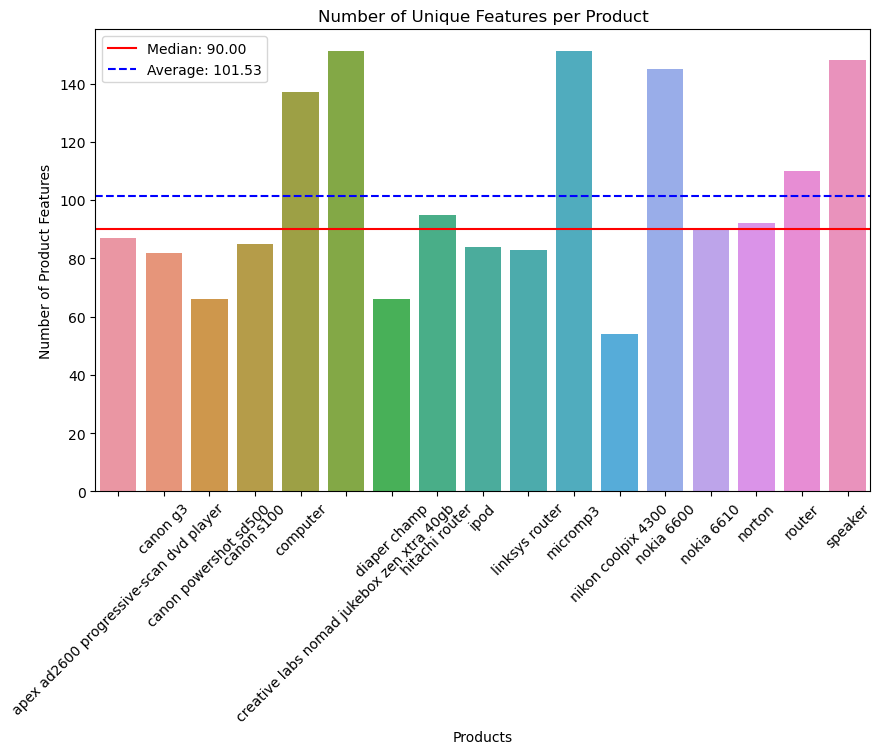

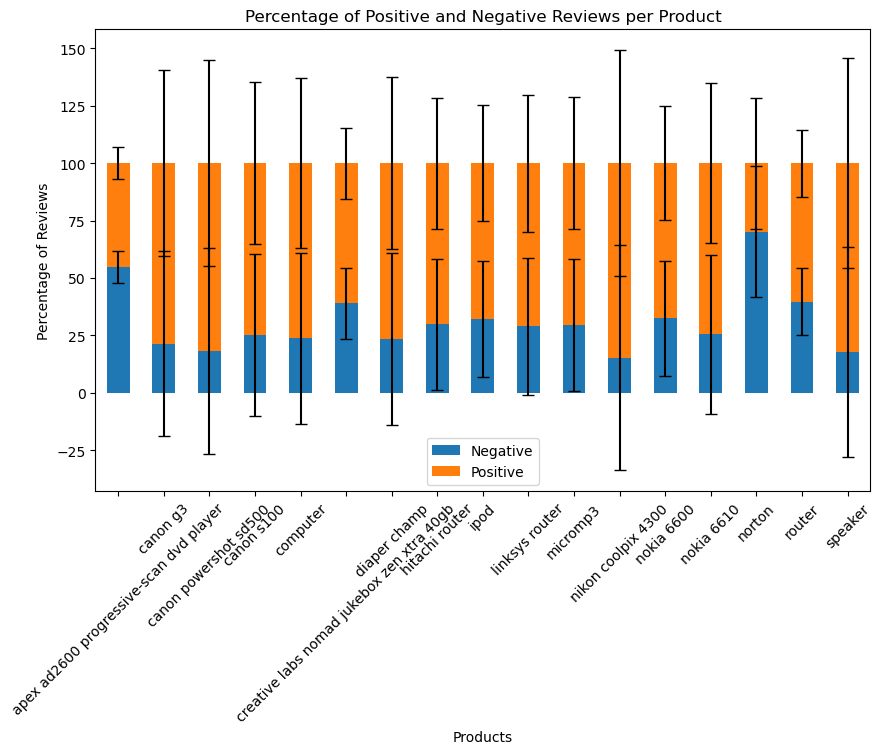

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_features_per_product(df):
    features_per_product = df.groupby('product')['product_feature'].nunique()
    avg_features = features_per_product.mean()  # Calculate average
    median_features = features_per_product.median()  # Calculate median
    plt.figure(figsize=(10, 6))
    sns.barplot(x=features_per_product.index, y=features_per_product.values)
    plt.axhline(median_features, color='r', linestyle='-', label=f'Median: {median_features:.2f}')  # Add median line
    plt.axhline(avg_features, color='b', linestyle='--', label=f'Average: {avg_features:.2f}')  # Add avg line
    plt.title('Number of Unique Features per Product')
    plt.xlabel('Products')
    plt.ylabel('Number of Product Features')
    plt.legend()  # Add legend
    plt.xticks(rotation=45)
    plt.show()

def plot_sentiment_balance(df):
    sentiment_balance = df.groupby(['product', 'sentiment']).size().reset_index(name='count')
    total_reviews_per_product = sentiment_balance.groupby('product')['count'].sum().reset_index(name='total')
    sentiment_balance = pd.merge(sentiment_balance, total_reviews_per_product, on='product')
    sentiment_balance['percentage'] = (sentiment_balance['count'] / sentiment_balance['total']) * 100
    sentiment_balance_pivot = sentiment_balance.pivot(index='product', columns='sentiment', values='percentage')

    # Calculate standard deviation
    std_dev = sentiment_balance.groupby('product')['percentage'].std()

    sentiment_balance_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), yerr=std_dev, capsize=4)
    plt.title('Percentage of Positive and Negative Reviews per Product')
    plt.xlabel('Products')
    plt.ylabel('Percentage of Reviews')
    plt.legend(['Negative', 'Positive'])
    plt.xticks(rotation=45)
    plt.show()

plot_features_per_product(df_all_reviews_cleaned)
plot_sentiment_balance(df_all_reviews_cleaned)

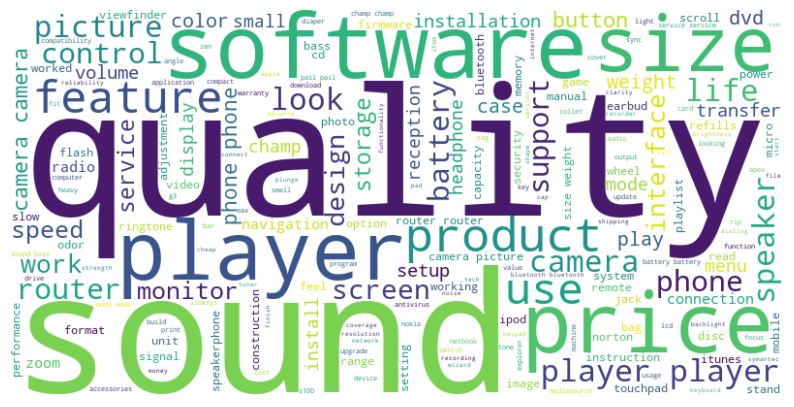

,product,review,review_length,product_feature,sentiment,symbol
count,5782,5782,5782.000000,5782,5782.000000,5782
unique,17,4606,NaN,924,NaN,1
top,creative labs nomad jukebox zen xtra 40gb,after much delay i received my acer netbook aspire one and i can teell you i am very satisfied with this computer is very pretty well finished high quality so quiet not heated than other netb...,NaN,player,NaN,
freq,847,9,NaN,275,NaN,5782
mean,NaN,NaN,100.341923,NaN,0.677447,NaN
std,NaN,NaN,61.930801,NaN,0.467494,NaN
min,NaN,NaN,0.000000,NaN,0.000000,NaN
25%,NaN,NaN,57.000000,NaN,0.000000,NaN
50%,NaN,NaN,87.000000,NaN,1.000000,NaN
75%,NaN,NaN,128.000000,NaN,1.000000,NaN


In [5]:
from wordcloud import WordCloud

def plot_word_cloud(df):
    """
    This function generates a word cloud of the most common product features.
    """
    features = ' '.join(df['product_feature'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(features)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

plot_word_cloud(df_all_reviews_cleaned)
df_all_reviews_cleaned.describe(include='all')

The Word Cloud emphasizes key product features like **quality**, **software**, **sound**, and **price**.

These insights will guide feature selection and model setup, improving sentiment analysis. The next section defines the data preprocessing steps taken for further model training and prediction.

### <center> Data Preprocessing </center> 

Training a Machine Learning model necessitates crucial preprocessing steps like tokenization, lemmatization, and removal of stop words, which simplifies data and emphasizes informative sections (Mikolov et al., 2013).

Tokenization divides text into analyzable tokens (Jurafsky & Martin, 2019), while lemmatization converts words to their base form, improving model generalization (Nasukawa & Yi, 2003). Non-informative stop words and custom stop words considered as noisy, like 'product', 'feature', 'item', 'amazon', are eliminated as they are considered noise in this specific context.

Stemming, which can yield non-real words, is not emplyoed in favor of linguistically correct lemmatization (Nasukawa & Yi, 2003). Post-processing, the Term Frequency-Inverse Document Frequency (TF-IDF) vectorizer numerically transforms text data, indicating word significance within a document and corpus (Ramos, 2003).

The following code cell illustrates this implementation.

In [6]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)

# Instantiate lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()

# NLTK's default stop words
default_stopwords = set(stopwords.words('english'))

# Add our own custom stopwords
custom_stopwords = set(['product', 'feature', 'item', 'amazon'])

all_stopwords = default_stopwords.union(custom_stopwords)

def preprocess_text(text):
    """Tokenizes, removes stop words, and lemmatizes the text."""
    # Tokenize the text
    words = word_tokenize(text)

    # Remove punctuation and set to lower case
    words = [word.lower() for word in words if word.isalpha()]

    # Remove stop words
    words = [word for word in words if word not in all_stopwords]

    # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

### <center> Feature Extraction </center> 

The feature extraction process for sentiment analysis involves pre-processing steps like tokenization, punctuation removal, case normalization, stop words removal, and lemmatization to standardize text data, reduce noise, and extract meaningful features.

##### <center> Feature Importance Evaluation </center> 

Sentiment analysis in Machine Learning relies on assessing feature importance, which refers to data aspects like product name or sentence length. Random Forest is a significant choice for model training due to its capacity for complex data and prevention of overfitting (Breiman, 2001). It ranks feature importance based on their impact on model accuracy, making it relevant for tasks requiring interpretability and understanding of feature effects (Doshi-Velez & Kim, 2017). Recognizing feature importance improves interpretability, assists in feature selection, and offers insights for Opinion Mining (Guyon & Elisseeff, 2003; Pang & Lee, 2008).

The succeeding section showcases a Random Forest application for feature ranking.

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# For reproducibility purposes, whenever possible, the randomness of the functions are controlled.
RANDOM_STATE = 0

def encode_features(df):
    """
    This function encodes categorical features into numerical form.
    """
    le = LabelEncoder()
    df['product'] = le.fit_transform(df['product'])
    df['review'] = le.fit_transform(df['review'])
    df['review_length'] = le.fit_transform(df['review_length'])
    df['product_feature'] = le.fit_transform(df['product_feature'])
    
    # to allow the feature importance on the new_features that do not contain this column
    if 'symbol' in df.columns:
        df['symbol'] = le.fit_transform(df['symbol'])

    return df

def split_data(X, y):
    """
    This function splits the data into training and test sets.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    return X_train, X_test, y_train, y_test

def train_model(X_train, y_train):
    """
    This function trains a Random Forest classifier on the training data.
    """
    clf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, class_weight='balanced')
    clf.fit(X_train, y_train)
    return clf

def get_feature_importances(clf, X):
    """
    This function ranks the features based on their importance in the Random Forest model.
    """
    feature_importances = pd.DataFrame(clf.feature_importances_,
                                       index = X.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)
    return feature_importances

df_all_reviews_to_encode = df_all_reviews_cleaned.copy()
df_all_reviews_encoded = encode_features(df_all_reviews_to_encode)
X = df_all_reviews_encoded.drop(['sentiment'], axis=1) 
y = df_all_reviews_encoded['sentiment']
X_train, X_test, y_train, y_test = split_data(X, y)
clf = train_model(X_train, y_train)
feature_importances = get_feature_importances(clf, X)

feature_importances.head()

,importance
review,0.305992
product_feature,0.271300
review_length,0.266972
product,0.155736
symbol,0.000000


The above feature importance output, generated through the Random Forest algorithm, quantitatively estimates the significance of each feature in predicting sentiment strength. Among these, the 'review', 'product_feature', and 'review_length' aspects appear to have the most influential role.

| Feature          | Importance Score | Note                                                                                     |
|------------------|------------------|:-------------------------------------------------------------------------------------------------|
| `review`       | 0.306813         | Highly influential in determining sentiment strength; captures specific words and phrases.      |
| `product_feature`| 0.271174         | Represents specific product attributes; key aspect of Opinion Mining.        |
| `review_length`        | 0.266964         | Related to complexity or verbosity of review; may correlate with intensity of sentiment.                           |
| `product`        | 0.155049         | Reflects inherent biases or preferences towards certain products or categories.                 |
| `symbol`         | 0.000000         | Contains valuable information like annotations or symbols; has the lowest importance score.     |


Therefore, 'sentence', 'feature', and 'sentence_length' were selected for their notable contribution to the sentiment prediction task.

##### <center> Product Feature Extraction and Pruning </center> 

POS tagging is chosen for product feature extraction, improving sentiment pattern detection (Pang and Lee, 2008). Using the NLTK's RegexpParser, sentences are chunked, focusing on adjective-noun pairs, often sentiment-rich (Ramisch, 2017).

These initial phrases are subjected to Latent Semantic Analysis (LSA) to reveal hidden sentiments (Deerwester et al., 1990). Using TfidfVectorizer and TruncatedSVD, the goal is to capture dominant sentiment features.

Moreover, a Pointwise Mutual Information (PMI) based technique is applied for feature pruning:

$$ \text{PMI}(x,y) = \log \left( \frac{p(x,y)}{p(x)p(y)} \right) $$

Where *p(x,y)* denotes the joint probability of *x* and *y*, and *p(x)* and *p(y)* signify their individual probabilities. In the context of product reviews, PMI helps pinpoint terms (features) that show a pronounced association with specific products, enhancing the probability of capturing product-centric sentiments (Turney, 2002). The effectiveness of PMI lies in its ability to discern the strength of word associations, filtering out weak or coincidental relations and emphasizing significant and consistent term co-occurrences (Bouma, 2009).

The optimal PMI threshold was determined by analyzing PMI values and minimum count values. After visual inspection, a multiplier of **k=1.8** was applied, adjusting the threshold to **0.36** and setting the mean minimum count to **4**. This resulted in an average of **18.53** features per product.

Reusing sentiment labels for product features preserves original sentiment classification, ensuring performance variations are derived from newly derived features, despite potential biases in large datasets. This strategy has been considered acceptable within this study's scope.

The following code cell demonstrates this procedure.

In [8]:
import math
from collections import defaultdict, Counter

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer

# For reproducibility purposes, whenever possible, the randomness of the functions are controlled.
RANDOM_STATE = 0

NUMBER_OF_FEATURES = 90  # Using the mean from the original dataset.
PMI_THRESHOLD = 0.36
MIN_COUNT = 3

def extract_phrases_grouped(df):
    results = defaultdict(list)

    for product, group in df.groupby('product'):
        sentences = group['review']

        for text in sentences:
            # POS tagging
            pos_tags = nltk.pos_tag(preprocess_text(text).split(' ')) # preprocess_text is applied
            # Define chunk pattern
            chunk_pattern = r"""Chunk: {<JJ.*><NN.*>+}"""

            # Chunking
            chunk_parser = nltk.RegexpParser(chunk_pattern)
            chunked_sentence = chunk_parser.parse(pos_tags)

            # Extract phrases
            phrases = [' '.join(leaf[0] for leaf in tree.leaves()) 
                    for tree in chunked_sentence.subtrees() 
                    if tree.label() == 'Chunk']
            
            results[product].extend(phrases)

    return results


def apply_lsa(phrases):
    # Apply TfidfVectorizer
    vectorizer = TfidfVectorizer(max_features=NUMBER_OF_FEATURES, ngram_range=(1,2))
    tfidf_matrix = vectorizer.fit_transform(phrases)

    # Apply TruncatedSVD (LSA)
    svd = TruncatedSVD(NUMBER_OF_FEATURES, random_state=RANDOM_STATE)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)
    lsa_matrix = lsa.fit_transform(tfidf_matrix)

    # Get the most informative words for each component
    feature_names = vectorizer.get_feature_names_out()
    informative_words = [[word for _, word in sorted(zip(svd.components_[i], feature_names), reverse=True)[:3]] 
                        for i in range(svd.n_components)]
    return lsa_matrix, informative_words


def calculate_pmi(df):
    total_reviews = len(df)
    term_counts = Counter(df['product_feature'])
    sentiment_counts = Counter(df['sentiment'])
    joint_counts = Counter(list(zip(df['product_feature'], df['sentiment'])))
    
    pmi_scores = {}
    for term, term_count in term_counts.items():
        for sentiment, sentiment_count in sentiment_counts.items():
            joint_count = joint_counts[(term, sentiment)]
            if joint_count == 0:
                continue
            pmi = math.log((joint_count * total_reviews) / (term_count * sentiment_count))
            pmi_scores[term] = pmi

    return pmi_scores


def extract_new_features(df, phrases_by_product, pmi_threshold=PMI_THRESHOLD, min_count=MIN_COUNT):
    new_features = []

    # Create a mapping from review to sentiment for easy lookup
    review_to_sentiment = dict(zip(df['review'], df['sentiment']))

    # Apply LSA for each product
    for product, group in df.groupby('product'):
        phrases = phrases_by_product[product]
        lsa_matrix, informative_words = apply_lsa(phrases)

        for sentence in group['review']:  # iterate over original reviews
            # Fetch the sentiment label for the current review
            current_sentiment = review_to_sentiment[sentence]
            
            # iterate over extracted phrases and corresponding component words
            for phrase, component_words in zip(phrases, informative_words):
                if phrase in sentence:  # check if the phrase is part of the original sentence
                    for word in component_words:
                        new_features.append({
                            'product': product, 
                            'review': sentence, 
                            'review_length': len(sentence), 
                            'product_feature': word, 
                            'sentiment': current_sentiment # Reuse existing sentiment associated with the review
                        })
    
    df_new_features = pd.DataFrame(new_features)
    # Calculate PMI scores for the features
    pmi_scores = calculate_pmi(df_new_features)
    
    # Select features based on PMI scores and minimum count
    selected_features = [
        feature for feature, score in pmi_scores.items() 
        if score > pmi_threshold 
        and df_new_features['product_feature'].value_counts()[feature] > min_count
    ]

    # Prune features
    df_new_features = df_new_features[df_new_features['product_feature'].isin(selected_features)]
    return df_new_features

phrases_by_product = extract_phrases_grouped(df_all_reviews_cleaned)
df_new_features = extract_new_features(df_all_reviews_cleaned, phrases_by_product)

df_new_features.head(-1)

,product,review,review_length,product_feature,sentiment
6,apex ad2600 progressive-scan dvd player,but if you re looking for my opinion of the apex dvd player i love it,72,front panel,1
7,apex ad2600 progressive-scan dvd player,but if you re looking for my opinion of the apex dvd player i love it,72,panel,1
26,apex ad2600 progressive-scan dvd player,it s very sleek looking with a very good front panel button layout and it has a great feature set,99,machine,1
27,apex ad2600 progressive-scan dvd player,it s very sleek looking with a very good front panel button layout and it has a great feature set,99,machine,1
35,apex ad2600 progressive-scan dvd player,it s very sleek looking with a very good front panel button layout and it has a great feature set,99,machine,1
...,...,...,...,...,...
5932,speaker,i believe this are great speakers but you also have to accept the audio capabilities of your desktop computer or laptop i try this at bestbuy and the sound was perfect for this small speaker now...,538,compact,1
5934,speaker,i believe this are great speakers but you also have to accept the audio capabilities of your desktop computer or laptop i try this at bestbuy and the sound was perfect for this small speaker now...,538,con,1
5935,speaker,i believe this are great speakers but you also have to accept the audio capabilities of your desktop computer or laptop i try this at bestbuy and the sound was perfect for this small speaker now...,538,stand,1
5936,speaker,i believe this are great speakers but you also have to accept the audio capabilities of your desktop computer or laptop i try this at bestbuy and the sound was perfect for this small speaker now...,538,speaker wire,1


##### <center> Impact of PMI Threshold on Features per Product Variance </center> 

Below, the demonstration on how the PMI threshold was selected based on the first point where the difference between consecutive standard deviations became positive, with a multiplier **k=1.8** value employed.

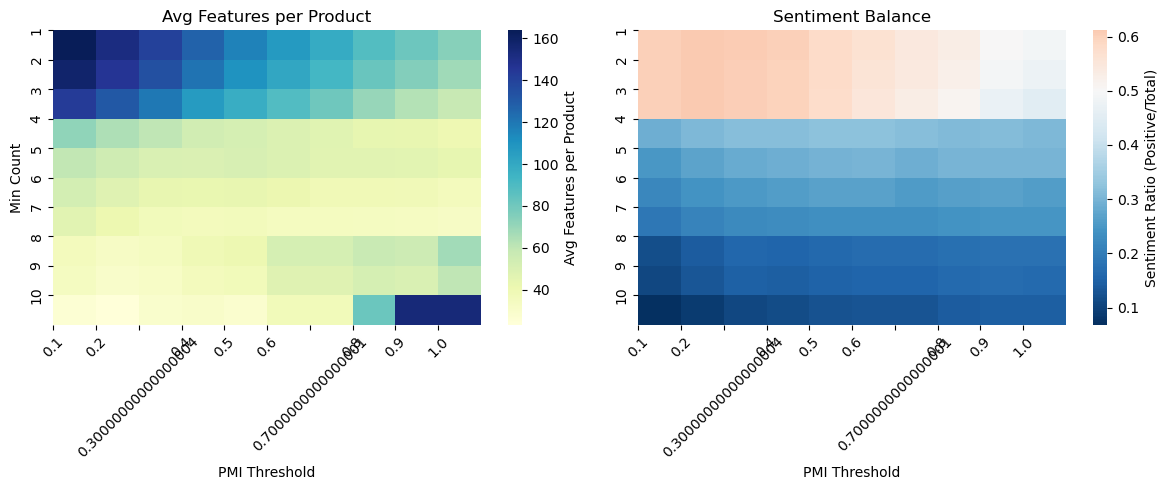

Initial PMI Threashold is 0.2
Adjusted PMI Threashold is 0.36000000000000004


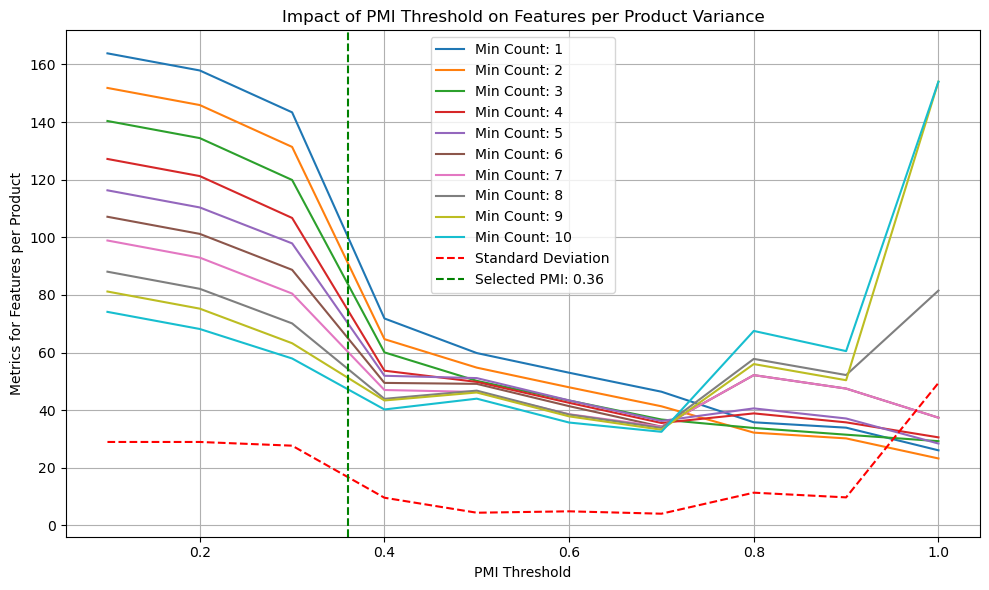

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define exploration ranges
PMI_THRESHOLD_RANGE = np.linspace(0.1, 1, 10)
MIN_COUNT_RANGE = np.arange(1, 11)
PMI_BUFFER = 1.8

def compute_metrics_for_params(df, PMI_THRESHOLD_RANGE, MIN_COUNT_RANGE):
    features_per_product = []
    sentiment_ratios = []
    
    phrases_by_product = extract_phrases_grouped(df)
    
    for threshold in PMI_THRESHOLD_RANGE:
        for min_count in MIN_COUNT_RANGE:
            pruned_features = extract_new_features(
                df, phrases_by_product, pmi_threshold=threshold, min_count=min_count
            )
            
            # Compute the number of features per product
            avg_features = pruned_features.groupby('product').size().mean()
            features_per_product.append(avg_features)
            
            # Compute sentiment balance (assuming binary sentiment of positive/negative)
            total = len(pruned_features)
            positives = sum(pruned_features['sentiment'] == 1)
            sentiment_ratio = positives / total
            sentiment_ratios.append(sentiment_ratio)
    
    return features_per_product, sentiment_ratios


def plot_heatmaps(PMI_THRESHOLD_RANGE, MIN_COUNT_RANGE, features_per_product, sentiment_ratios):
    # Reshape data for heatmaps
    features_matrix = np.array(features_per_product).reshape(len(MIN_COUNT_RANGE), len(PMI_THRESHOLD_RANGE))
    sentiment_matrix = np.array(sentiment_ratios).reshape(len(MIN_COUNT_RANGE), len(PMI_THRESHOLD_RANGE))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Heatmap for Features per Product
    sns.heatmap(features_matrix, ax=ax1, cmap="YlGnBu", cbar_kws={'label': 'Avg Features per Product'})
    ax1.set_xticks(np.arange(len(PMI_THRESHOLD_RANGE)))
    ax1.set_yticks(np.arange(len(MIN_COUNT_RANGE)))
    ax1.set_xticklabels(PMI_THRESHOLD_RANGE, rotation=45)
    ax1.set_yticklabels(MIN_COUNT_RANGE)
    ax1.set_xlabel('PMI Threshold')
    ax1.set_ylabel('Min Count')
    ax1.set_title('Avg Features per Product')

    # Heatmap for Sentiment Balance
    sns.heatmap(sentiment_matrix, ax=ax2, cmap="RdBu_r", center=0.5, cbar_kws={'label': 'Sentiment Ratio (Positive/Total)'})
    ax2.set_xticks(np.arange(len(PMI_THRESHOLD_RANGE)))
    ax2.set_yticks(np.arange(len(MIN_COUNT_RANGE)))
    ax2.set_xticklabels(PMI_THRESHOLD_RANGE, rotation=45)
    ax2.set_yticklabels(MIN_COUNT_RANGE)
    ax2.set_xlabel('PMI Threshold')
    ax2.set_title('Sentiment Balance')

    plt.tight_layout()
    plt.show()

    
def plot_line_graphs(PMI_THRESHOLD_RANGE, features_per_product_matrix):
    plt.figure(figsize=(10, 6))

    # Calculate the standard deviation of feature counts for each PMI threshold
    std_devs = np.std(features_per_product_matrix, axis=1)

    # Calculate the difference between each consecutive standard deviation
    diff_std_devs = np.diff(std_devs)

    # Find the first PMI threshold where the difference becomes positive
    try:
        selected_idx = np.where(diff_std_devs > 0)[0][0] + 1
        selected_pmi = PMI_THRESHOLD_RANGE[selected_idx]
    except IndexError:
        selected_pmi = PMI_THRESHOLD_RANGE[-1]

    for idx, min_count in enumerate(MIN_COUNT_RANGE):
        plt.plot(PMI_THRESHOLD_RANGE, features_per_product_matrix[:, idx], label=f"Min Count: {min_count}")

    print(f"Initial PMI Threashold is {selected_pmi}")    
    # add a buffer on top of the initial PMI threshold
    adjusted_pmi_threashold = (selected_pmi * PMI_BUFFER)
    
    print(f"Adjusted PMI Threashold is {adjusted_pmi_threashold}")

    plt.plot(PMI_THRESHOLD_RANGE, std_devs, linestyle='--', label='Standard Deviation', color='red')
    plt.axvline(adjusted_pmi_threashold, color='green', linestyle='--', label=f'Selected PMI: {adjusted_pmi_threashold:.2f}')
    plt.xlabel("PMI Threshold")
    plt.ylabel("Metrics for Features per Product")
    plt.title("Impact of PMI Threshold on Features per Product Variance")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


features_per_product, sentiment_ratios = compute_metrics_for_params(
    df_all_reviews_cleaned, PMI_THRESHOLD_RANGE, MIN_COUNT_RANGE
)

# Plotting
plot_heatmaps(PMI_THRESHOLD_RANGE, MIN_COUNT_RANGE, features_per_product, sentiment_ratios)
features_per_product_matrix = np.array(features_per_product).reshape(len(PMI_THRESHOLD_RANGE), len(MIN_COUNT_RANGE))
plot_line_graphs(PMI_THRESHOLD_RANGE, features_per_product_matrix)

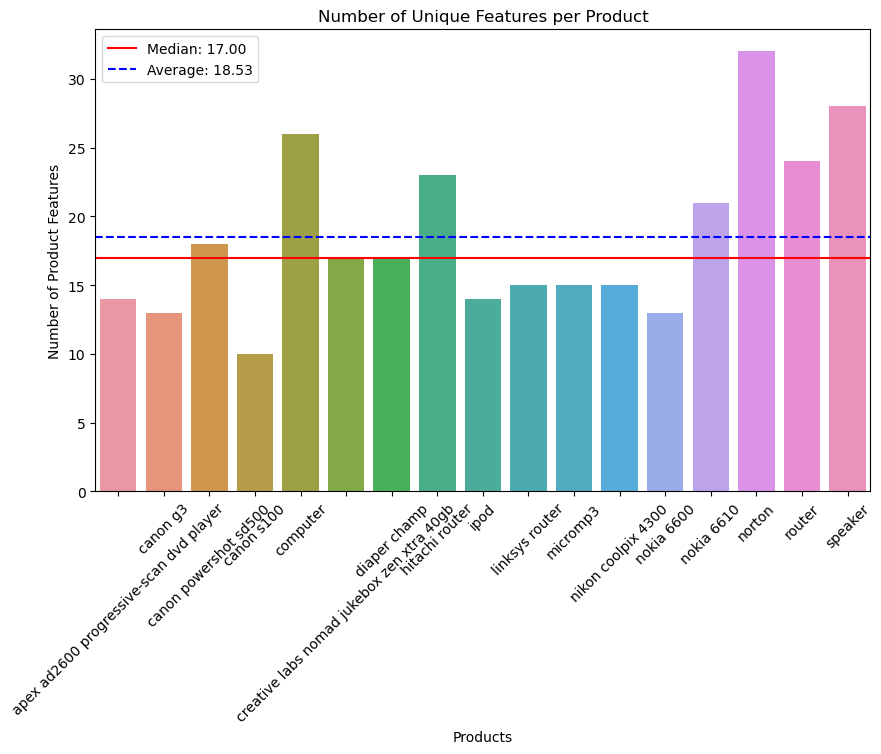

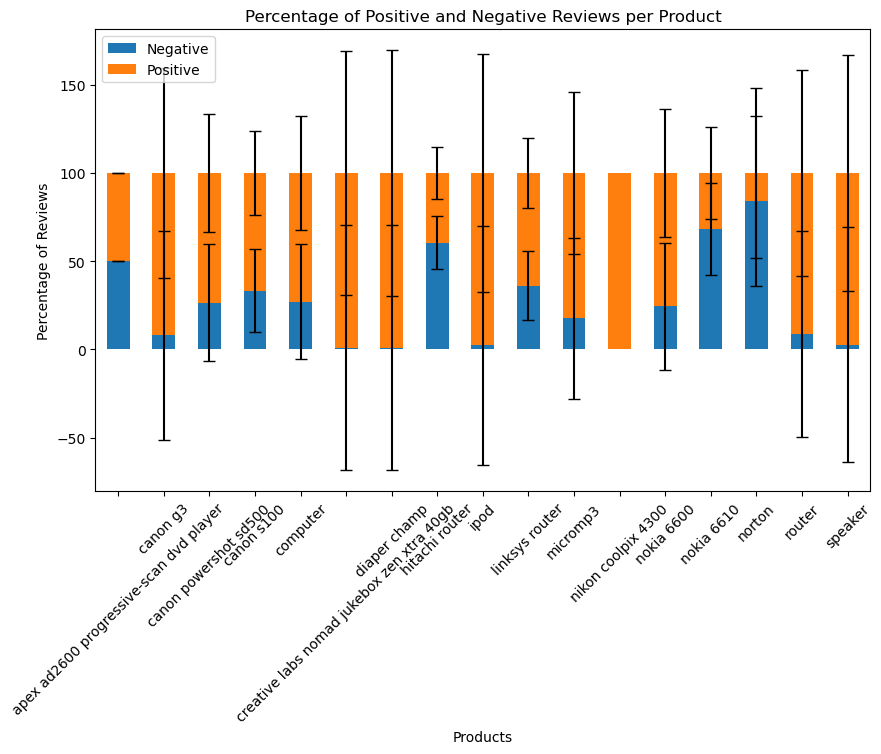

In [10]:
# Plot the features per product and the sentiment balance for the new extracted features
plot_features_per_product(df_new_features)
plot_sentiment_balance(df_new_features)

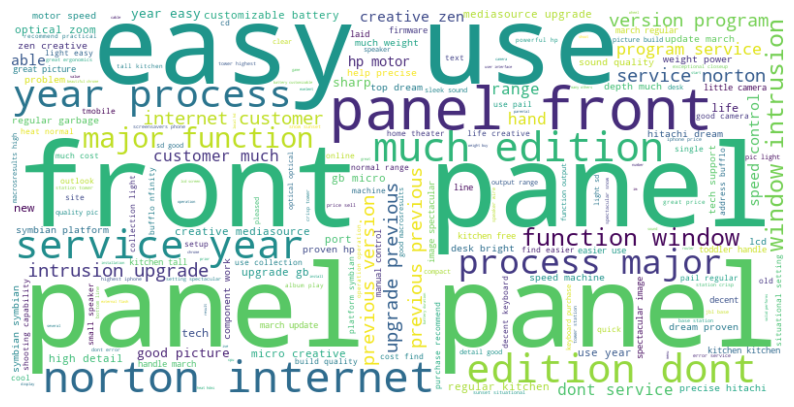

,product,review,review_length,product_feature,sentiment
count,1937,1937,1937.000000,1937,1937.000000
unique,17,337,NaN,215,NaN
top,norton,also if you do manage to get it installed any problems with liveupdate or with system works will also affect the functionality andor the process of updating internet security,NaN,service,NaN
freq,427,68,NaN,60,NaN
mean,NaN,NaN,134.351058,NaN,0.608673
std,NaN,NaN,71.662588,NaN,0.488173
min,NaN,NaN,13.000000,NaN,0.000000
25%,NaN,NaN,79.000000,NaN,0.000000
50%,NaN,NaN,123.000000,NaN,1.000000
75%,NaN,NaN,173.000000,NaN,1.000000


In [11]:
# Plot word cloud and the stats overview for the new extracted features
plot_word_cloud(df_new_features)
df_new_features.describe(include='all')

Assessing feature extraction in text analysis involves measuring model performance using extracted features. The following section compares Naïve Bayes and TextBlob on original and new datasets for the Sentiment Analysis task.

### <center> Sentiment Analysis Models </center>

In this experiment, two models will be analysed: Naïve Bayes and TextBlob. For both, the same data preparation is employed. It involves combining various text fields for context to aid sentiment prediction, followed by preprocessing steps such as punctuation removal, lowercase conversion, stopword elimination, and lemmatization (Jurafsky & Martin, 2019).

For Naïve Bayes, the dataset is split into an 80/20 training-to-test ratio to train the model and evaluate performance, preventing overfitting.

#### <center>  Baseline Model: Naïve Bayes </center>

As a baseline, a sentiment analysis pipeline is implemented, combining NLP and ML techniques. This pipeline is used for training a Naïve Bayes classifier, effective for text classification (Manning, Raghavan, & Schütze, 2008).

The dataset's positive-negative sentiment imbalance, a notable challenge, may induce majority class bias. It is countered using the Synthetic Minority Over-sampling Technique (SMOTE) that generates diverse synthetic class examples, enhancing the model's performance on this class and reducing overfitting risk (He & Garcia, 2009; Chawla et al., 2002).

The pipeline includes text-to-numerical conversion via TfidfVectorizer and class balancing with SMOTE, ensuring suitable numerical input and a balanced dataset (Salton & McGill, 1986; Chawla, Bowyer, Hall, & Kegelmeyer, 2002).

Furthermore, hyperparameter tuning is also employed to optimise performance using a grid search with cross-validation, providing a robust performance measure and optimal model configuration (Hastie, Tibshirani, & Friedman, 2009).

The next code cell describe this implementation.

In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, train_test_split

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import nltk
import numpy as np

# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)

# Instantiate lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()

# NLTK's default stop words
default_stopwords = set(stopwords.words('english'))

# Add our own custom stopwords
custom_stopwords = set(['product', 'feature', 'item', 'amazon'])

all_stopwords = default_stopwords.union(custom_stopwords)

# For reproducibility purposes, whenever possible, the randomness of the functions are controlled.
RANDOM_STATE = 0

def combine_text(row):
    """Combines review, product_feature and review_length into a single string and preprocesses the text."""
    combined = row['review'] + ' ' + row['product_feature'] + ' ' + str(row['review_length'])
    return preprocess_text(combined)

def prepare_data(df):
    """Prepares data for training the model."""
    df_copy = df.copy()
    df_copy['combined_text'] = df_copy.apply(combine_text, axis=1)
    X = df_copy['combined_text']
    y = df_copy['sentiment']
    return train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)


def build_model():
    """Builds a text classification model."""
    text_clf = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
        ('sampling', SMOTE(sampling_strategy='auto', random_state=RANDOM_STATE)),
        ('clf', MultinomialNB()),
    ])
    return text_clf


def train_model(text_clf, X_train, y_train):
    """Trains the model."""
    # define parameters for GridSearchCV
    parameters = {'clf__alpha':  np.logspace(-3, 0, 50)}

    clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)
    clf.fit(X_train, y_train)

    return clf


def create_naive_bayes_model(X_train, X_test, y_train, y_test):
    """The main function to prepare data, build model, train and evaluate it."""
    text_clf = build_model()
    model = train_model(text_clf, X_train.ravel(), y_train)
    return model

#### <center>  Baseline Model Evaluation: Naïve Bayes </center>

The Naïve Bayes model evaluation employs quantitative and visual metrics such as the Classification Report, Confusion Matrix, ROC Curve, and Precision-Recall Curve to determine sentiment prediction efficacy (Fawcett, 2006; Sokolova & Lapalme, 2009). 

The Classification Report details precision, recall, f1-score, and support for each sentiment class, offering comprehensive performance insights. The Confusion Matrix visually represents correct and incorrect predictions per class, identifying error types.

The ROC Curve plots the True Positive Rate against the False Positive Rate, with the area under the curve summarizing model performance (Fawcett, 2006). Lastly, the Precision-Recall Curve, which plots precision against recall for different thresholds, provides further performance perspective, emphasizing the precision-recall trade-off.

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns


def plot_model_report(y_test, predictions):
    """Plot metrics for model performance evaluation."""
    print(classification_report(y_test, predictions))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, predictions)
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

#### <center>  Baseline Model Evaluation: Naïve Bayes - Original dataset </center>

Firsly, the baseline model is evaluated against the original dataset, with human-annotated product features.

              precision    recall  f1-score   support

           0       0.70      0.73      0.71       377
           1       0.87      0.85      0.86       780

    accuracy                           0.81      1157
   macro avg       0.78      0.79      0.78      1157
weighted avg       0.81      0.81      0.81      1157



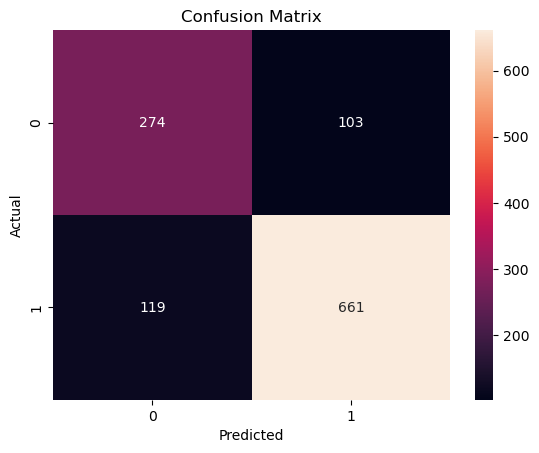

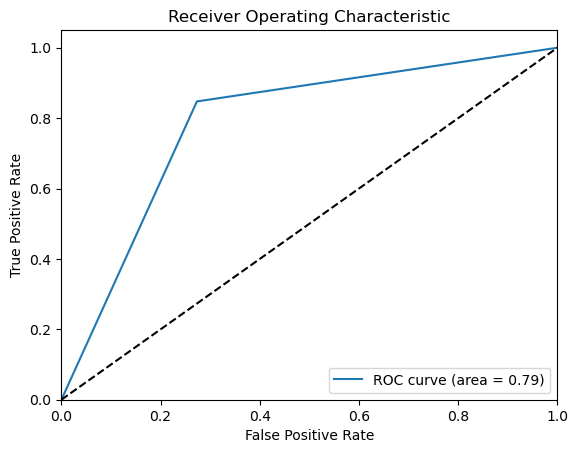

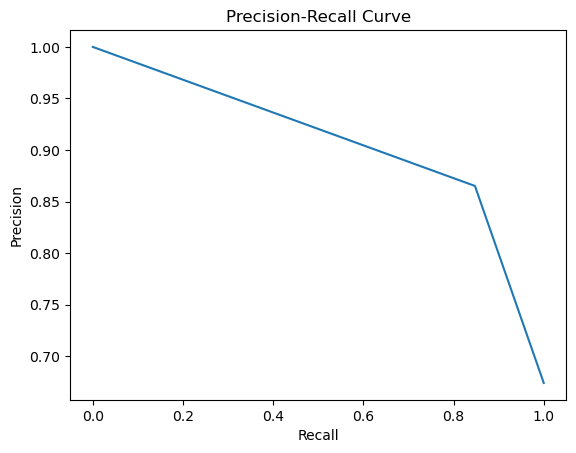

In [14]:
# Data preparation, using the original dataset
X_train, X_test, y_train, y_test = prepare_data(df_all_reviews_cleaned)

# Model training
naive_bayes_baseline_model = create_naive_bayes_model(X_train, X_test, y_train, y_test)

# Model prediction
predictions = naive_bayes_baseline_model.predict(X_test)

# Model evaluation
plot_model_report(y_test, predictions)

The model demonstrates a strong performance with an overall accuracy of 81%, showing higher precision and F1-score for positive sentiments, while maintaining balanced metrics for both classes. The following table presents the model's performance overview:

| Metric/Class      | 0 (Negative Sentiment) | 1 (Positive Sentiment) | Overall/Avg |
|-------------------|------------------------|------------------------|-------------|
| **Precision**     | 0.70                   | 0.87                   | -           |
| **Recall**        | 0.73                   | 0.85                   | -           |
| **F1-Score**      | 0.71                   | 0.86                   | -           |
| **Support**       | 377                    | 780                    | 1157        |
| **Accuracy**      | -                      | -                      | 0.81        |
| **Macro Avg**     | 0.78                   | 0.79                   | 0.78        |
| **Weighted Avg**  | 0.81                   | 0.81                   | 0.81        |



#### <center>  Baseline Model Evaluation: Naïve Bayes - New product features </center>

Secondly, the baseline model is evaluated against the new dataset (unseen data), with product features extracted with a combination of techniques outlined earlier. 

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       152
           1       0.89      0.94      0.92       236

    accuracy                           0.89       388
   macro avg       0.90      0.88      0.89       388
weighted avg       0.89      0.89      0.89       388



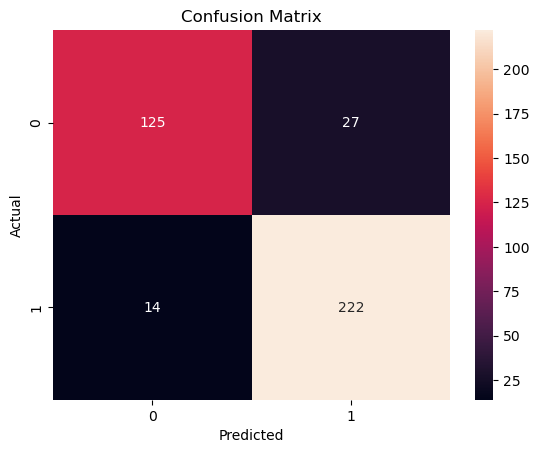

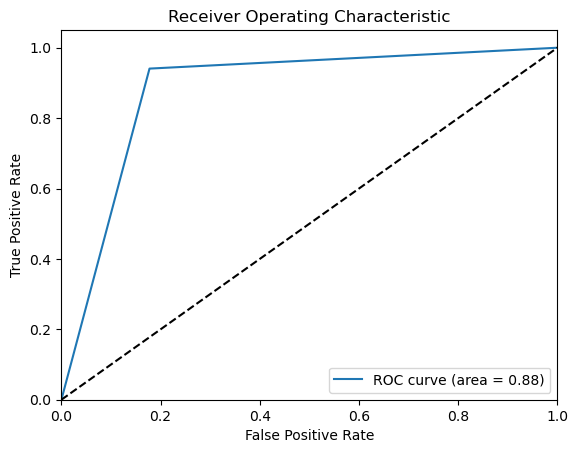

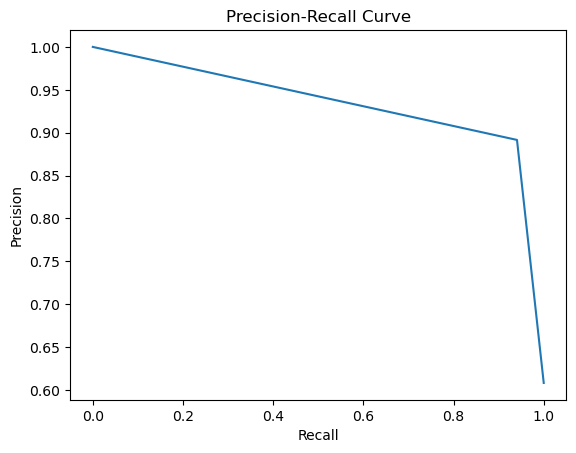

In [15]:
# Data preparation, considering the newly extracted features
new_features_X_train, new_features_X_test, new_features_y_train, new_features_y_test = prepare_data(df_new_features)

# no retrain is performed, only the new_features_X_test is used.
new_features_predictions = naive_bayes_baseline_model.predict(new_features_X_test)

# Model evaluation on new test set (unseen data)
plot_model_report(new_features_y_test, new_features_predictions)

New product feature integration has boosted the Naïve Bayes model's sentiment prediction performance with an overall accuracy of 89%, marking significant improvements in precision, recall, and F1-score for negative sentiments compared to the original dataset. The following table presents the model's performance overview:

| Metric/Class      | 0 (Negative Sentiment) | 1 (Positive Sentiment) | Overall/Avg |
|-------------------|------------------------|------------------------|-------------|
| **Precision**     | 0.90                   | 0.89                   | -           |
| **Recall**        | 0.82                   | 0.94                   | -           |
| **F1-Score**      | 0.86                   | 0.92                   | -           |
| **Support**       | 152                    | 236                    | 388         |
| **Accuracy**      | -                      | -                      | 0.89        |
| **Macro Avg**     | 0.90                   | 0.88                   | 0.89        |
| **Weighted Avg**  | 0.89                   | 0.89                   | 0.89        |


#### <center>  Comparative Model Evaluation: TextBlob - Original dataset </center>

TextBlob offers sentiment scores without training, serving as an efficient benchmarking tool. Given its simplicity, it is extensively used in both industry and academia for initial sentiment analysis, making it a pertinent benchmark (Loria, 2018). The foundation of TextBlob's sentiment analysis is pattern analysis, a module within its ecosystem.  

It provides polarity scores ranging from -1 (most negative) to 1 (most positive) and subjectivity scores from 0 (most objective) to 1 (most subjective). This dual metric system offers a detailed insight into sentiment and objectivity, rendering it invaluable for early sentiment analysis tasks (Loria, 2018).

              precision    recall  f1-score   support

           0       0.57      0.65      0.61       377
           1       0.82      0.77      0.79       780

    accuracy                           0.73      1157
   macro avg       0.70      0.71      0.70      1157
weighted avg       0.74      0.73      0.73      1157



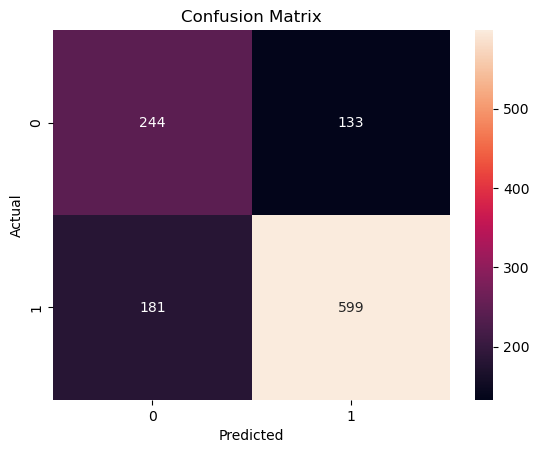

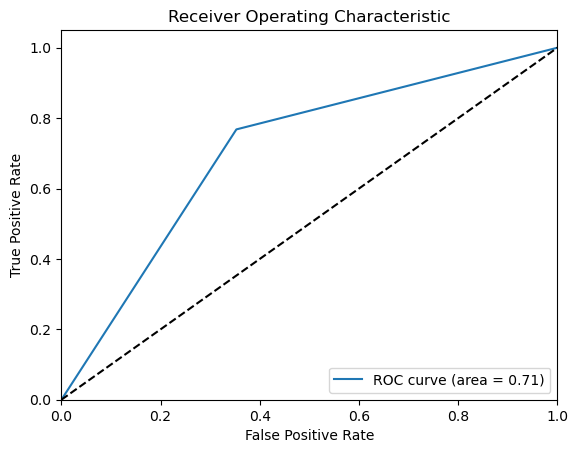

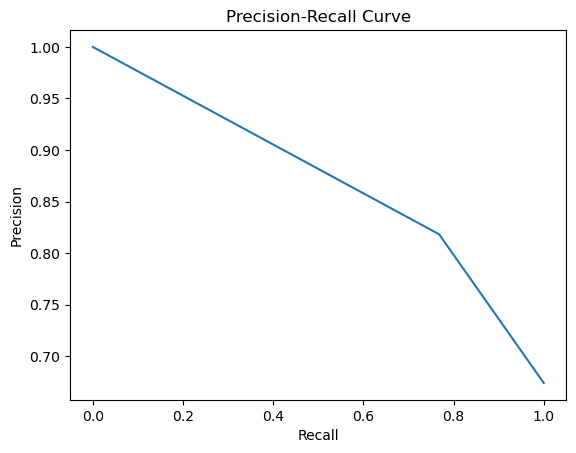

In [16]:
from textblob import TextBlob

def classify_sentiment_with_textblob(text):
    """Function to classify sentiment using TextBlob"""
    analysis = TextBlob(text)
    # As the targt is a binary classification, the polarity can be simply determined as:
    if analysis.sentiment.polarity > 0:
        return 1  # Positive sentiment
    else:
        return 0  # Negative sentiment

# Make a copy of the dataframe before the experiment
X_text_textblob_experiment , y_test_textblob_experiment = X_test.copy(), y_test.copy()

# Use TextBlob to predict sentiments on the test set
y_text_textblob_experiment_pred = X_text_textblob_experiment.apply(classify_sentiment_with_textblob)

# Model evaluation
plot_model_report(y_test_textblob_experiment, y_text_textblob_experiment_pred)

The results from TextBlob on the original dataset, when compared to the Naïve Bayes model, appear slightly inferior but still decent given its simplicity and zero-training requirement. It presents an inferior accuracy of 0.74 and it shows a notably reduced precision, recall, and F1-score for negative sentiments, while positive sentiment metrics remain relatively stable albeit slightly diminished. The following table presents the model's performance overview:

| Metric/Class      | 0 (Negative Sentiment) | 1 (Positive Sentiment) | Overall/Avg |
|-------------------|------------------------|------------------------|-------------|
| **Precision**     | 0.57                   | 0.82                   | -           |
| **Recall**        | 0.65                   | 0.77                   | -           |
| **F1-Score**      | 0.61                   | 0.79                   | -           |
| **Support**       | 377                    | 780                    | 1157        |
| **Accuracy**      | -                      | -                      | 0.73        |
| **Macro Avg**     | 0.70                   | 0.71                   | 0.70        |
| **Weighted Avg**  | 0.74                   | 0.73                   | 0.73        |


#### <center>  Comparative Model Evaluation: TextBlob - New product features </center>

Lastly, TextBlob model is evaluated against the new dataset (unseen data).

              precision    recall  f1-score   support

           0       0.80      0.47      0.60       152
           1       0.73      0.92      0.82       236

    accuracy                           0.75       388
   macro avg       0.77      0.70      0.71       388
weighted avg       0.76      0.75      0.73       388



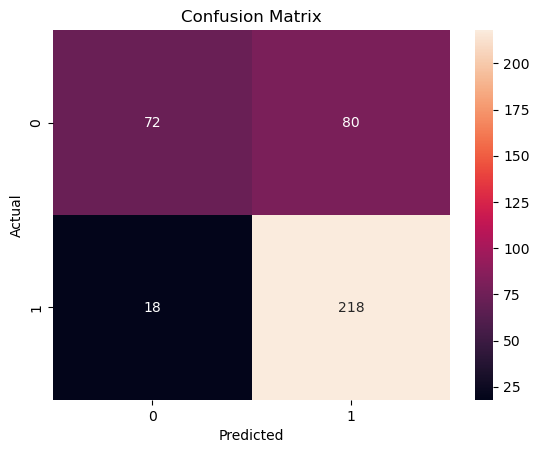

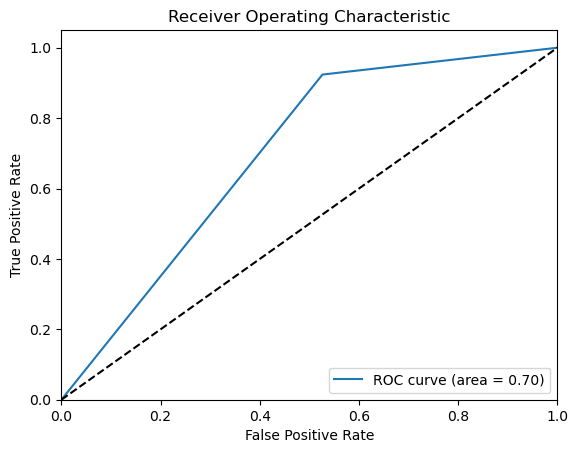

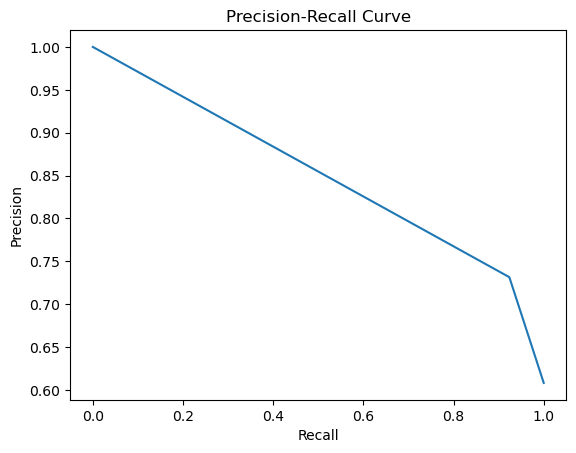

In [17]:
# Make a copy of the dataframe before the experiment
new_features_X_text_textblob_experiment = new_features_X_test.copy()
new_features_y_test_textblob_experiment = new_features_y_test.copy()

# Use TextBlob to predict sentiments on the test set
new_features_y_text_textblob_experiment_pred = new_features_X_text_textblob_experiment.apply(
    classify_sentiment_with_textblob
)

# Model evaluation on new test set (unseen data)
plot_model_report(new_features_y_test_textblob_experiment, new_features_y_text_textblob_experiment_pred)

Relative to the previous results of Naïve Bayes on the dataset with new extracted features, the TextBlob shows again an inferior accuracy of 0.76, with a substantial decrease in recall for negative sentiments, while the positive sentiment recall has slightly decreased, reducing overall performance. On comparing this results with TextBlob's performance on the original dataset, it shows an overall performance gain while showing a significant worse reacall for negative class. The following table presents the model's performance overview:

| Metric/Class      | 0 (Negative Sentiment) | 1 (Positive Sentiment) | Overall/Avg |
|-------------------|------------------------|------------------------|-------------|
| **Precision**     | 0.80                   | 0.73                   | -           |
| **Recall**        | 0.47                   | 0.92                   | -           |
| **F1-Score**      | 0.60                   | 0.82                   | -           |
| **Support**       | 152                    | 236                    | 388         |
| **Accuracy**      | -                      | -                      | 0.75        |
| **Macro Avg**     | 0.77                   | 0.70                   | 0.71        |
| **Weighted Avg**  | 0.76                   | 0.75                   | 0.73        |


### <center> System Output  </center>

The output of the implemented system summarizes positive and negative reviews for each product feature, based on test data. The following cells display the output based on Naïve Model and TextBlob models predictions, with original and new product features datasets.

In [18]:
from collections import defaultdict
import json

def generate_summary(df, X_test, predictions):
    """Generates a summary of number of positive and negative reviews for each product feature."""
    
    # Create a temporary DataFrame to hold the test data and predictions
    df_temp = df.loc[X_test.index].copy()  # Use the indices of X_test to get the corresponding rows from the original dataframe
    df_temp['predicted_sentiment'] = predictions
    
    summary_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
    
    # iterate over each row and update counts
    for _, row in df_temp.iterrows():
        product = row['product']
        feature = row['product_feature']
        sentiment = row['predicted_sentiment']
        
        if not summary_dict[product][feature]['positive_reviews']:
            summary_dict[product][feature]['positive_reviews'] = 0
            
        if not summary_dict[product][feature]['negative_reviews']:
            summary_dict[product][feature]['negative_reviews'] = 0
        
        if sentiment == 1:
            summary_dict[product][feature]['positive_reviews'] += 1
        else:
            summary_dict[product][feature]['negative_reviews'] += 1
    
    # convert summary_dict to the requested format
    summary_list = []
    for product, features in summary_dict.items():
        product_dict = {"product": product.title(), "features": dict(features)}
        summary_list.append(product_dict)
    
    return summary_list

#### <center>  Baseline Model Output: Naïve Bayes - Original dataset </center>

In [19]:
# Baseline Model Output: Naïve Bayes - Original dataset
summary_naive_bayes_original = generate_summary(df_all_reviews_cleaned, X_test, predictions)
print(json.dumps(summary_naive_bayes_original, indent=2))

[
  {
    "product": "Nokia 6600",
    "features": {
      "compaibility": {
        "positive_reviews": 0,
        "negative_reviews": 1
      },
      "navigatee": {
        "positive_reviews": 0,
        "negative_reviews": 1
      },
      "screen": {
        "positive_reviews": 4,
        "negative_reviews": 1
      },
      "bluetooth": {
        "positive_reviews": 2,
        "negative_reviews": 4
      },
      "keypad": {
        "positive_reviews": 2,
        "negative_reviews": 0
      },
      "os": {
        "positive_reviews": 0,
        "negative_reviews": 1
      },
      "life": {
        "positive_reviews": 2,
        "negative_reviews": 3
      },
      "bars": {
        "positive_reviews": 1,
        "negative_reviews": 0
      },
      "nokia": {
        "positive_reviews": 0,
        "negative_reviews": 1
      },
      "color": {
        "positive_reviews": 1,
        "negative_reviews": 0
      },
      "recorder": {
        "positive_reviews": 1,
        "negat

#### <center>  Baseline Model Output: Naïve Bayes - New product features </center>

In [20]:
# Baseline Model Output: Naïve Bayes - New product features
summary_naive_bayes_new_features = generate_summary(df_new_features, new_features_X_test, new_features_predictions)
print(json.dumps(summary_naive_bayes_new_features, indent=2))

[
  {
    "product": "Micromp3",
    "features": {
      "creative mediasource": {
        "positive_reviews": 2,
        "negative_reviews": 0
      },
      "upgrade": {
        "positive_reviews": 3,
        "negative_reviews": 0
      },
      "micro solves": {
        "positive_reviews": 1,
        "negative_reviews": 0
      },
      "creative zen": {
        "positive_reviews": 5,
        "negative_reviews": 0
      },
      "micro": {
        "positive_reviews": 3,
        "negative_reviews": 0
      },
      "gb": {
        "positive_reviews": 2,
        "negative_reviews": 0
      },
      "cable": {
        "positive_reviews": 0,
        "negative_reviews": 1
      },
      "im": {
        "positive_reviews": 0,
        "negative_reviews": 1
      },
      "problem": {
        "positive_reviews": 0,
        "negative_reviews": 1
      },
      "life": {
        "positive_reviews": 1,
        "negative_reviews": 0
      }
    }
  },
  {
    "product": "Speaker",
    "features

#### <center>  Comparative Model Output: TextBlob - Original dataset </center>

In [21]:
# Comparative Model Output: TextBlob - Original dataset
summary_textblob_original = generate_summary(
    df_all_reviews_cleaned, X_text_textblob_experiment, y_text_textblob_experiment_pred
)
print(json.dumps(summary_textblob_original, indent=2))

[
  {
    "product": "Nokia 6600",
    "features": {
      "compaibility": {
        "positive_reviews": 0,
        "negative_reviews": 1
      },
      "navigatee": {
        "positive_reviews": 0,
        "negative_reviews": 1
      },
      "screen": {
        "positive_reviews": 4,
        "negative_reviews": 1
      },
      "bluetooth": {
        "positive_reviews": 1,
        "negative_reviews": 5
      },
      "keypad": {
        "positive_reviews": 2,
        "negative_reviews": 0
      },
      "os": {
        "positive_reviews": 1,
        "negative_reviews": 0
      },
      "life": {
        "positive_reviews": 2,
        "negative_reviews": 3
      },
      "bars": {
        "positive_reviews": 1,
        "negative_reviews": 0
      },
      "nokia": {
        "positive_reviews": 0,
        "negative_reviews": 1
      },
      "color": {
        "positive_reviews": 1,
        "negative_reviews": 0
      },
      "recorder": {
        "positive_reviews": 1,
        "negat

#### <center>  Comparative Model Output: TextBlob - New product features dataset </center>

In [22]:
# Comparative Model Output: TextBlob - New product features dataset
summary_textblob_new_features = generate_summary(
    df_new_features, new_features_X_text_textblob_experiment, new_features_y_text_textblob_experiment_pred
)
print(json.dumps(summary_textblob_new_features, indent=2))

[
  {
    "product": "Micromp3",
    "features": {
      "creative mediasource": {
        "positive_reviews": 2,
        "negative_reviews": 0
      },
      "upgrade": {
        "positive_reviews": 2,
        "negative_reviews": 1
      },
      "micro solves": {
        "positive_reviews": 0,
        "negative_reviews": 1
      },
      "creative zen": {
        "positive_reviews": 5,
        "negative_reviews": 0
      },
      "micro": {
        "positive_reviews": 3,
        "negative_reviews": 0
      },
      "gb": {
        "positive_reviews": 2,
        "negative_reviews": 0
      },
      "cable": {
        "positive_reviews": 1,
        "negative_reviews": 0
      },
      "im": {
        "positive_reviews": 1,
        "negative_reviews": 0
      },
      "problem": {
        "positive_reviews": 0,
        "negative_reviews": 1
      },
      "life": {
        "positive_reviews": 0,
        "negative_reviews": 1
      }
    }
  },
  {
    "product": "Speaker",
    "features

## <center> Evaluation and Discussion  </center>

Both the Naïve Bayes and TextBlob models, when utilized for sentiment analysis, demonstrate distinct performances on the datasets. Naïve Bayes, rooted in Bayes' theorem, is widely recognized for its efficiency and straightforwardness in text classification tasks (McCallum & Nigam, 1998). Its core advantage lies in its capability to compute probabilities from training data, which enables it to adjust to domain-specific data seamlessly. Such adaptability was profoundly manifested when evaluating the model with the new dataset with the extracted features, leading to a noteworthy boost in the model's efficacy.

TextBlob, on the other hand, capitalizes on pattern analysis and yields instant results without the requirement for any supplementary training. While it is exceptionally suitable for generalized sentiment analysis in both academic and industrial settings due to its swift deployment, it occasionally encounters performance setbacks on niche or specialized texts, largely because of its reliance on pre-established patterns (Loria, 2018).

The experiment outcome underpin these variations quite strikingly. The Naïve Bayes model, while already performing well on the original dataset, saw its efficiency amplified with the integration of new features. Conversely, TextBlob's performance, despite showing modest improvements with the addition of new features, underscored the profound impact of feature engineering on pattern-based models.

The empirical results, particularly when considering a larger dataset, may shed light on more subtle nuances, potentially leading to more granulated and robust findings (Hastie, Tibshirani, & Friedman, 2009).

In summary, the mechanism chosen for feature extraction has proven its relevance, reinforcing the critical role it plays in amplifying model performance, especially in the context of NLP and Sentiment Analysis.

## <center> Conclusion  </center>

A comprehensive understanding of the dataset and its context provides a robust foundation for subsequent analysis and machine learning modeling. Indeed, it has been observed that the performance of a model is directly correlated with the quality of the data (Wixom, 2001). Furthermore, feature selection and extraction have proven to be essential techniques in data preparation for model training, particularly in sentiment analysis.

In addition, the comparison of the pattern-based model (TextBlob) and the probabilistic Naïve Bayes provided relevant insights into sentiment analysis. Naïve Bayes is flexible and tailored for specialized applications due to its training requirement, whereas TextBlob offers quick, reliable results for general texts but can struggle with domain-specific content. 

As sentiment analysis advances, more modern and advanced techniques are noteworthy. Feature extraction methods such as Word2Vec, TF-IDF, and embeddings like BERT capture semantic nuances (Mikolov et al., 2013; Devlin et al., 2018). Neural network models such as LSTM and Transformer-based ones excel in analyzing text sequences (Hochreiter & Schmidhuber, 1997; Vaswani et al., 2017).

Ultimately, model selection for sentiment analysis should consider both dataset features and quality, besides the ongoing innovations, merging traditional and current methods for enhanced insights.

## <center> References  </center>

Bird, S., Klein, E. and Loper, E., 2009. Natural Language Processing with Python: Analyzing Text with the Natural Language Toolkit. O'Reilly Media.

Bouma, G., 2009. Normalized (Pointwise) Mutual Information in Collocation Extraction. In: Proceedings of the Biennial GSCL Conference 2009; Potsdam, Germany. 1 October 2009.

Breiman, L., 2001. Random forests. Machine Learning, 45(1), pp.5-32.

Chawla, N.V. et al., 2002. SMOTE: synthetic minority over-sampling technique. Journal of artificial intelligence research, 16, pp.321-357.

Deerwester, S. et al., 1990. Indexing by latent semantic analysis. Journal of the American society for information science, 41(6), pp.391-407.

Devlin, J. et al., 2018. BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. arXiv preprint arXiv:1810.04805.

Doshi-Velez, F. and Kim, B., 2017. Towards a rigorous science of interpretable machine learning. arXiv preprint arXiv:1702.08608.

Fawcett, T., 2006. An introduction to ROC analysis. Pattern recognition letters, 27(8), pp.861-874.

Guyon, I. and Elisseeff, A., 2003. An Introduction to Variable and Feature Selection. Journal of Machine Learning Research, 3, pp.1157-1182.

Hastie, T., Tibshirani, R. and Friedman, J., 2009. The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer Series in Statistics.

He, H. and Ma, Y., 2013. Imbalanced Learning: Foundations, Algorithms, and Applications. Wiley-IEEE Press.

Hochreiter, S. and Schmidhuber, J., 1997. Long short-term memory. Neural computation, 9(8), pp.1735-1780.

Hu, M. and Liu, B., 2004. Mining and Summarizing Customer Reviews. KDD'04. Available from: https://www.cs.uic.edu/~liub/publications/kdd04-revSummary.pdf [Accessed 10 July 2023].

Jurafsky, D. and Martin, J.H., 2019. Speech and Language Processing.

Keim, D. et al., 2008. Visual Analytics: Definition, Process, and Challenges. In: Information Visualization. Springer, Berlin, Heidelberg, pp.154-175.

Kelleher, J.D., Mac Namee, B. and D'Arcy, A., 2015. Fundamentals of Machine Learning for Predictive Data Analytics: Algorithms, Worked Examples, and Case Studies. MIT Press.

Kohavi, R., 1995. A study of cross-validation and bootstrap for accuracy estimation and model selection. IJCAI'95.

Liu, B., 2004. Mining Opinion Features in Customer Reviews. AAAI'04. Available from: https://www.cs.uic.edu/~liub/publications/aaai04-featureExtract.pdf [Accessed 13 July 2023].

Loria, S., 2018. TextBlob: Simplified Text Processing. Available from: https://textblob.readthedocs.io/en/dev/ [Accessed 28 July 2023].

Manning, C., Raghavan, P. and Schütze, H., 2008. Introduction to Information Retrieval. Cambridge University Press.
McCallum, A. and Nigam, K., 1998. A comparison of event models for naive bayes text classification. In: AAAI-98 workshop on learning for text categorization (Vol. 752), pp.41-48.

Mikolov, T. et al., 2013. Distributed representations of words and phrases and their compositionality. Advances in neural information processing systems, 26.

Nasukawa, T. and Yi, J., 2003. Sentiment Analysis: Capturing Favorability Using Natural Language Processing. In: Proceedings of the 2nd International Conference on Knowledge Capture, Florida, 23-25 October 2003, pp.70-77. Available from: http://dx.doi.org/10.1145/945645.945658 [Accessed 15 July 2023].

Pang, B. and Lee, L., 2008. Opinion Mining and Sentiment Analysis. Foundations and Trends® in Information Retrieval, 2(1-2), pp.1-135.

Pedregosa, F. et al., 2011. Scikit-learn: Machine learning in Python. the Journal of machine Learning research, 12, pp.2825-2830.

Pipino, L.L., Lee, Y.W. and Wang, R.Y., 2002. Data Quality Assessment. Communications of the ACM, 45(4), pp.211-218.

Ramisch, C., 2017. Multiword expressions acquisition: A generic and open framework. Springer.

Ramos, J.E., 2003. Using TF-IDF to Determine Word Relevance in Document Queries. Available from: https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=b3bf6373ff41a115197cb5b30e57830c16130c2c [Accessed 19 July 2023].

Rose, S., Hair, N., & Clark, M., 2011. Online Customer Experience: A Review of the Business-to-Consumer Online Purchase Context. Available at: https://doi.org/10.1111/j.1468-2370.2010.00280.x [Accessed 14 August 2023].

Salton, G. and McGill, M.J., 1986. Introduction to modern information retrieval.

Sokolova, M. and Lapalme, G., 2009. A systematic analysis of performance measures for classification tasks. Information Processing & Management, 45(4), pp.427-437.

Turney, P.D., 2002. Thumbs up or thumbs down? Semantic orientation applied to unsupervised classification of reviews. In: Proceedings of the 40th annual meeting on association for computational linguistics. Association for Computational Linguistics, pp.417-424.

Wixom, B.H. and Watson, H.J., 2001. An empirical investigation of the factors affecting data warehousing success. MIS Quarterly, 25(1), pp.17-41. Management Information Systems Research Center, University of Minnesota. Available at: [https://doi.org/10.2307/3250957](https://doi.org/10.2307/3250957) [Accessed 15 August 2023].